<a href="https://colab.research.google.com/github/Rajat504/CLOUDYML/blob/main/Time_Series_Module4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><u>Assignment:3- ACF,PACF and Differencing</center></h1></u>
<br>

### Welcome to the 3rd assignment of the time series analysis module!!!

![3.1.gif](https://c.tenor.com/2gVj3kH-OSIAAAAC/spongebob-welcome.gif)

In this assignment you will be learning about ACF,PACF and Differencing.

<u>Table of contents:</u><br>


1.   Correlation
2.   Autocorrelation
3.   Partial Autocorrelation Function
4.   Differencing
     

So without wasting time lets start learning!!

<h2><u>Correlation</h2></u>

Statistical correlation summarizes the strength of the relationship between two variables.

We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables.The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

![3.2.png](https://cqeacademy.com/wp-content/uploads/2018/06/Scatter-Plots-and-Correlation-Examples.png)



Refer documentation: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

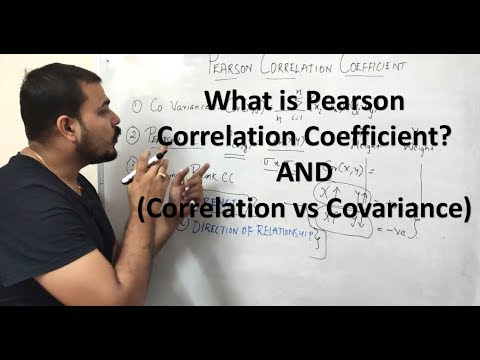

In [1]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('6fUYt1alA1U', width=700, height=400)

<h2><u>Autocorrelation</h2></u>
The correlation between time series measurements and observations from previous time steps, known as lags, can be calculated. This is known as a serial correlation, or autocorrelation, because the correlation of the time series observations is calculated with values from the same series at prior times.

<b>The AutoCorrelation Function, abbreviated as ACF, is a plot of the autocorrelation of a time series by lag. This graph is also known as a correlogram or autocorrelation plot.</b>

![3.3.png](https://cdn.corporatefinanceinstitute.com/assets/autocorrelation.png)

### Refer the below given video to understand autocorrelation function more clearly.

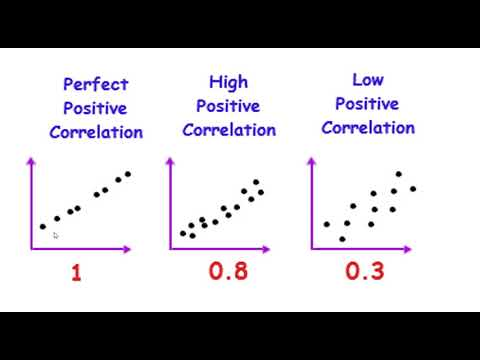

In [2]:
YouTubeVideo('Aft25mI1ffw', width=700, height=400)

Hope you clearly understood about autocorrelation function. Now lets move ahead with the practical implementation. Below is an example of calculating and plotting the autocorrelation plot for the Minimum Daily Temperatures using the plot_acf() function from the statsmodels library.

Lets start by importing some libraries.

* pandas: for storing and analysing data
* plot_acf: plotting the ACF,
read more: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html
* matplotlib: plotting graphs

In [3]:
# import the mentioned libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf




The dataset used in the project is present in the google drive. So the drive has to be first mounted to use the dataset. For that use the drive library from google.colab and then mount the drive using mount function.

In [4]:
# import drive from google.colab
from google.colab import drive

# mount the drive
drive.mount('/content/drive')


Mounted at /content/drive


Next, load the dataset using read_csv method of pandas in the df variable.

Download the dataset from the given link and upload it in your drive. https://drive.google.com/file/d/1oHvSwENhDd-czLha5i3v2pPOhY79bj4w/view?usp=sharing

After uploading use your dataset link for reading the data in the read_csv method. The dataset has two columns date and values(Daily minimum temperatures in Melbourne, Australia, 1981-1990). parse_dates attribute is to parse the dates so that it can be represented as an array of datetimes. parse_dates is used to make the dates uniform as dates can be present in different formats. Refer documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html. index_cols attribute is set to 0 which specifies Column(s) to use as the row labels of the DataFrame, either given as string name or column index. Plot the data having using the plot_acf function.

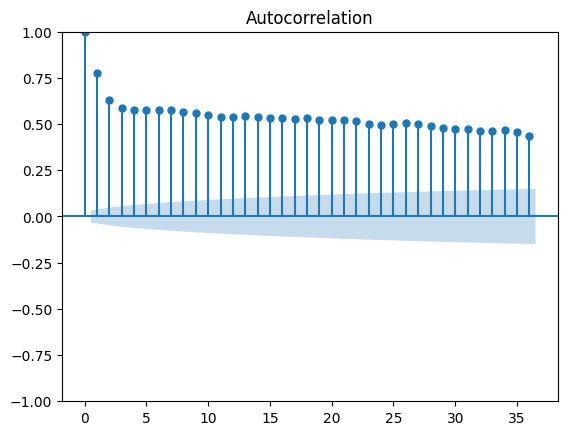

In [5]:
# copy the dataset path
url='/content/daily_min_temp.csv'
#read the data
df=pd.read_csv(url,parse_dates=['Date'],index_col=0)
#plot the dataset
# plot the acf
plot_acf(df)
# show the plot
plt.show()



Running the example creates a 2D plot showing the lag value along the x-axis and the correlation on the y-axis between -1 and 1. The graph shhows that the correlation between features decreases with increasing number of lags.

<h2><u>Partial Autocorrelation</h2></u>
A partial autocorrelation is a description of the relationship between an observation in a time series and observations at previous time steps, minus the associations between intervening observations.
<b>After removing the effect of any correlations attributable to terms at shorter lags, the partial autocorrelation at lag k is the correlation that results.</b>



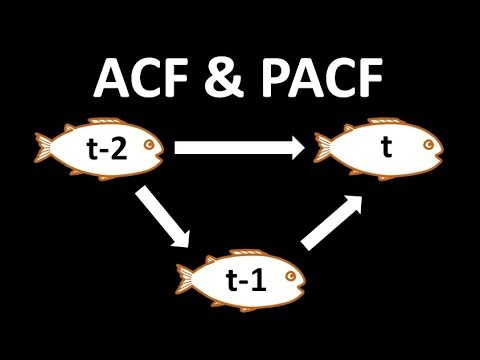

In [6]:
## Refer video
YouTubeVideo('DeORzP0go5I', width=700, height=400)

Have a look at the major difference points bwtween ACF and PACF.

![3.4.png](https://d1rwhvwstyk9gu.cloudfront.net/2020/02/ACF-AND-PACF-TO-USE.PNG)

Now lets move ahead with plotting PACF. Before that watch the video given below.

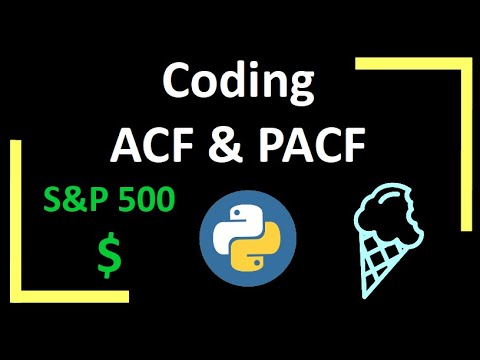

In [7]:
## Refer video
YouTubeVideo('y8opUEd05Dg', width=700, height=400)

Lets start by importing some libraries.

* pandas: for storing and analysing data
* plot_pacf: plotting the PACF,
read more: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.pacf.html
* matplotlib: plotting graphs

Pandas and matplotlib is already imported, so now we will only import plot_pacf.

In [8]:
# import the plot_pacf library
from statsmodels.graphics.tsaplots import plot_pacf


The dataset is also already loaded in the df variable. The dataset has two columns date and values(Daily minimum temperatures in Melbourne, Australia, 1981-1990). Directly plot the PACF using plot_pacf function.

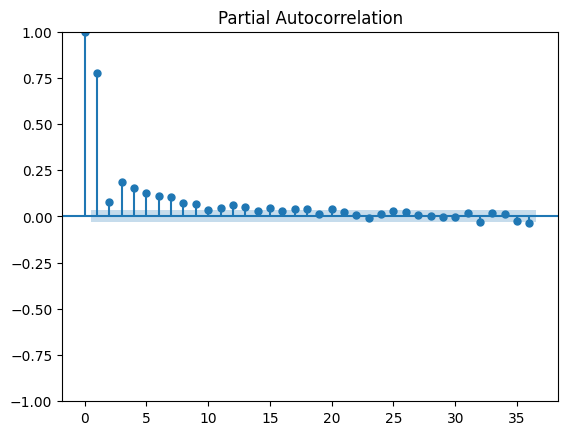

In [9]:
# plot the pacf
plot_pacf(df)

# show the plot
plt.show()


Above is the partial autocorrelation of the data. Comparing the PACF graph with ACF graph we can see that the correlation value is quite less in PACF. This because only direct correlations have been considered omitting the indirect correlations.

<h2><u>Differencing</h2></u>

Differencing is a time series dataset transformation method to make the time series stationary. It can be used to eliminate temporal dependence, or the dependence of a series on time. Trends and seasonality are examples of such structures.
By removing fluctuations in the level of a time series and so eliminating (or lowering) trend and seasonality, differencing can assist stabilise the mean of the time series.

![](http://static.xlstat.com/uploads/assets/Tutorials/Time/Differencing/desc6c.png)

By subtracting the past observation from the current observation, differencing is accomplished.

* difference(t) = observation(t) - observation(t-1)

When a prediction to be transformed back into the original scale, the procedure must be inverted.
By adding the observation from the previous time step to the difference value, this procedure can be reversed.

* inverted(t) = differenced(t) + observation(t-1)

A succession of differences and inverted differences can be determined in this manner.

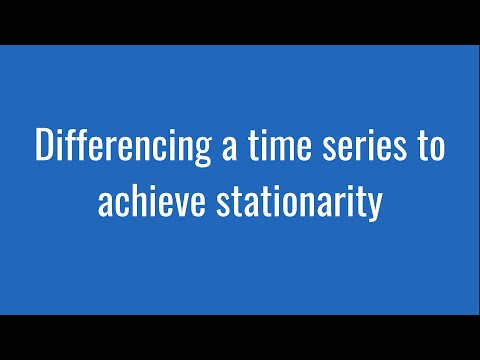

In [10]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('UzlDXFJZpZc', width=700, height=400)

<h4><u>Lag Difference</h4></u>

A lag-1 difference is the difference between two consecutive observations. The lag difference can be changed to fit the temporal structure of the situation. For time series containing a seasonal component, the lag is likely to be the seasonality's period (width).

<h4><u>Difference Order</h4></u>

After a differencing process, some temporal structure may still exist, such as in the case of a nonlinear trend.
As a result, the differencing procedure can be repeated until all temporal dependence has been removed. The difference order refers to the number of times differencing is conducted.

<h4><u>Implementing Differencing</h4></u>

This involves developing a new function that creates a differenced dataset. The function would loop through a provided series and calculate the differenced values at the specified interval or lag.


Lets first look at the dataset. For that import the necessary libraries like pandas and matplotlib.

In [11]:
# import the mentioned libraries
import pandas as pd
import matplotlib.pyplot as plt


The dataset used in the project is present in the google drive. So the drive has to be first mounted to use the dataset. For that use the drive library from google.colab and then mount the drive using mount function.

In [12]:
# import drive from google.colab
from google.colab import drive
# mount the drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Next, load the dataset using read_csv method of pandas in the df variable.

Download the dataset from the given link and upload it in your drive. https://drive.google.com/file/d/1GnPFEORLDJ2Lsn8Res8-0dETUeAYZ23D/view?usp=sharing

After uploading use your dataset link for reading the data in the read_csv method. The dataset has two columns date and values. parse_dates attribute is to parse the dates so that it can be represented as an array of datetimes. parse_dates is used to make the dates uniform as dates can be present in different formats. Refer documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html. index_cols attribute is set to 0 which specifies Column(s) to use as the row labels of the DataFrame, either given as string name or column index.

<Axes: xlabel='date'>

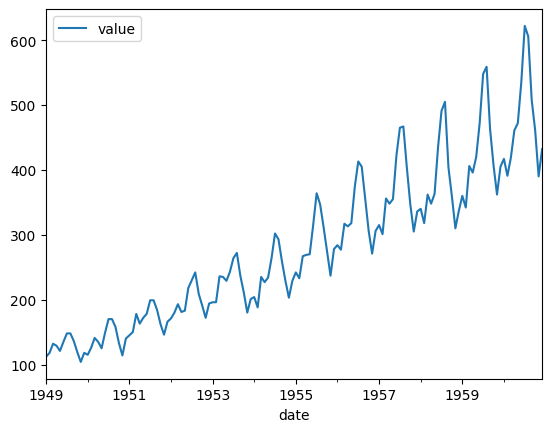

In [13]:
# copy the dataset path
url='/content/time_series_data.csv'

# read the data
df=pd.read_csv(url,parse_dates=['date'],index_col=0)

#plot the dataset
df.plot()


Hence, from the graph we can see that the data has both trend and seasonality which makes the data non-stationary. We will work on making this data stationary.<br>
Below we will define a function that will implement differencing.

<ipython-input-14-5dd928fe05f1>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = dataset['value'][i] - dataset['value'][i - interval]


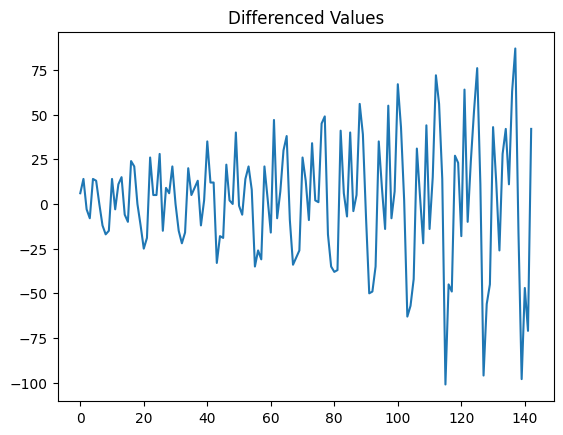

In [14]:
# create a differenced series
def difference(dataset, interval=1):

  #initialize a list
  diff = list()

	#run a for loop
  for i in range(interval, len(dataset)):

    #subtract the previous observation from current observation
    value = dataset['value'][i] - dataset['value'][i - interval]

    #append the value in the list
    diff.append(value)

  #return the series of list
  return pd.Series(diff)


#seperate the values
x=df.values

# difference the dataset
#apply the difference function
x = difference(df, 1)

#plot the differenced values
plt.plot(x)

#add title and show
plt.title('Differenced Values')
plt.show()



Hence the data is differenced. X axis denotes the number of observation and Y axis denotes the differenced value.

<h5><u>Differencing to Remove Trends</h5></u>

In this section, we'll look at how to eliminate a trend with the difference transform. By increasing the level, a trend renders a time series non-stationary. This causes the mean time series value to change over time.

Next, load the dataset using read_csv method of pandas in the df variable.

Download the dataset from the given link and upload it in your drive. https://drive.google.com/file/d/1p9v8n7hvjr0ZqTAw4tNUAklTUH34SY7-/view?usp=sharing

After uploading use your dataset link for reading the data in the read_csv method. The dataset has two columns date and values. parse_dates attribute is to parse the dates so that it can be represented as an array of datetimes. parse_dates is used to make the dates uniform as dates can be present in different formats. Refer documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html. index_cols attribute is set to 0 which specifies Column(s) to use as the row labels of the DataFrame, either given as string name or column index.



<Axes: xlabel='date'>

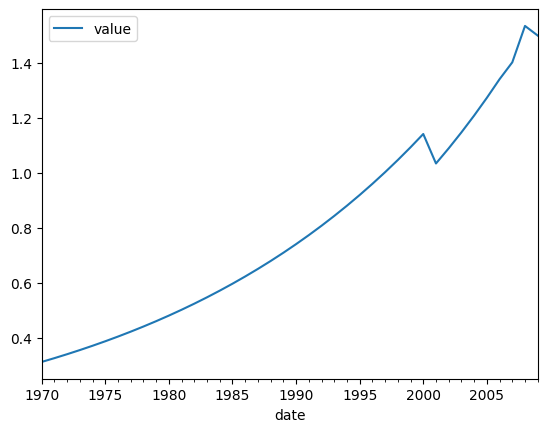

In [15]:
# copy the dataset path
url='/content/time_series_trend.csv'

# read the data
df=pd.read_csv(url,parse_dates=['date'],index_col=0)

#plot the dataset
df.plot()


The difference() method is applied to a fictitious dataset with a linearly increasing trend in the example below.

<ipython-input-16-b0b09401a2f6>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = dataset['value'][i] - dataset['value'][i - interval]


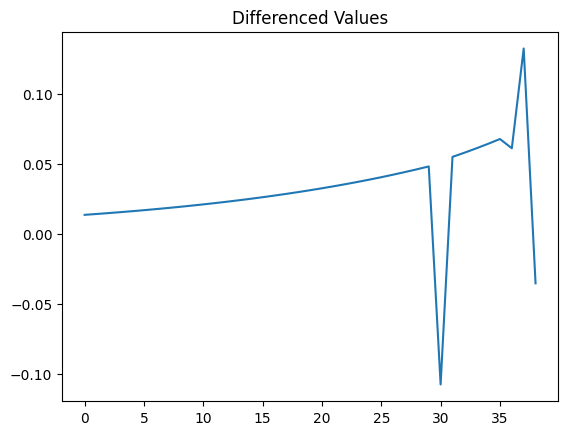

In [16]:
# create a differenced series
def difference(dataset, interval=1):

  #initialize a list
  diff = list()

	#run a for loop
  for i in range(interval, len(dataset)):



    #subtract the previous observation from current observation
    value = dataset['value'][i] - dataset['value'][i - interval]

    #append the value in the list
    diff.append(value)

  #return the list
  return pd.Series(diff)

#seperate the values
x=df.values

# difference the dataset
diff=difference(df, 1)

#plot the differenced data
plt.plot(diff)

#add title and show
plt.title('Differenced Values')
plt.show()


Hence from the above figure it is seen that the trend component has been smoothened ignoring some outliers.

<h5><u>Differencing to Remove Seasonality</h5></u>

In this section, we'll look at how to remove seasonality using the difference transform.Seasonal variation, often known as seasonality, refers to cycles that occur on a regular basis over time. Before beginning, mount the drive.

In [17]:
# import drive from google.colab
from google.colab import drive
# mount the drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Next, load the seasonality dataset using read_csv method of pandas in the df variable.

Download the dataset from the given link and upload it in your drive. https://drive.google.com/file/d/1lj9qe6BxIIWs4_f_6r8QqRuErQnNXjzL/view?usp=sharing

After uploading use your dataset link for reading the data in the read_csv method. The dataset has two columns date and values. parse_dates attribute is to parse the dates so that it can be represented as an array of datetimes. parse_dates is used to make the dates uniform as dates can be present in different formats. Refer documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html. index_cols attribute is set to 0 which specifies Column(s) to use as the row labels of the DataFrame, either given as string name or column index.

<Axes: xlabel='date'>

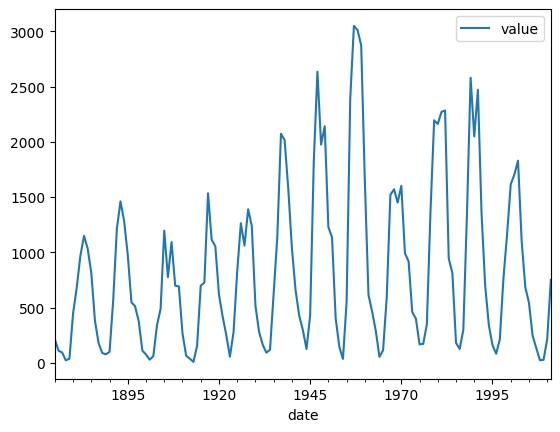

In [18]:
# copy the dataset path
url='/content/time_series_seasonality.csv'

# read the data
df=pd.read_csv(url,parse_dates=['date'],index_col=0)

#plot the dataset
df.plot()


Hence you can observe that, the data has seasonality. Use the difference transform to remove seasonality.

<ipython-input-19-affc0fef31af>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = dataset['value'][i] - dataset['value'][i - interval]


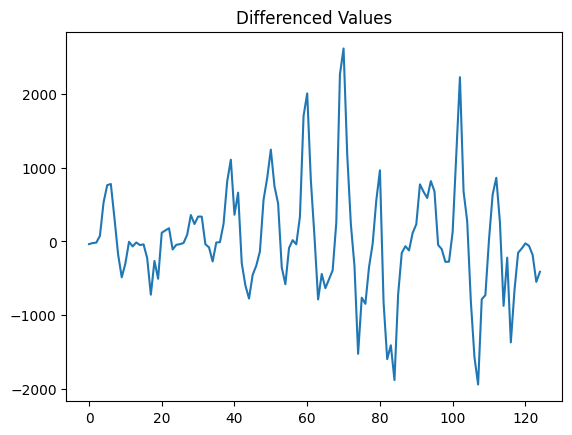

In [19]:
# create a differenced series
def difference(dataset, interval=1):

  #initialize a list
  diff = list()

  #run a for loop
  for i in range(interval, len(dataset)):

    #subtract the previous observation from current observation
    value = dataset['value'][i] - dataset['value'][i - interval]

    #append the value in the list
    diff.append(value)

  #return the list
  return pd.Series(diff)

#seperate the values
x=df.values

# difference the dataset
diff=difference(df, 12)

#plot the differenced data
plt.plot(diff)

#add title and show
plt.title('Differenced Values')
plt.show()


Hence, seasonality is removed and the data is now stationary.

In this assignment, you discovered how to calculate autocorrelation and partial autocorrelation plots for time series data with Python. Also you learned about differencing time series data.

Specifically, you learned:

* How to calculate and create an autocorrelation plot for time series data.
* How to calculate and create a partial autocorrelation plot for time series data.
* The difference and intuition for interpreting ACF and PACF plots.
* What is differencing of time series data
* How to remove trend and stationarity in time series


Keep practising until next assignment comes in. <br><br>
## Do fill the feedback form given below:
[Feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7)
<br><br> See you then!!

![3.5.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwVshNLPA0pjdIKQmHna_ZXY2_x4ZyUqL3s3x0P-MnOPe1R50UaYTvscpT-KwXekkrNqs&usqp=CAU)